`Created by Ayushi Dubey`

# Importing Necessary Libraries

All the necessary libraries used in the notebook are imported in the below cell. The functions - `standardise_smiles` and `standardise_inchikey` described in the `src` directory are also imported below.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from smiles_processing import standardise_smiles
from inchikey_processing import standardise_inchikey

# Data Preprocessing

The dataset was downloaded from ChEMBL in tsv format. Dataset contains 8715 entries. Thus, it is preprocessed to check for null or irrelevant data and satisfy the required format.

## Reading the raw data

In [2]:
df = pd.read_csv('../data/raw_data.tsv', delimiter='\t')

## Exploring the raw data

In [3]:
df.head()

,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,...,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key
0,CHEMBL1964670,NaN,NaN,Small molecule,NaN,132.16,53.0,53.0,0.32,46.53,...,9,3,1,0,132.0786,0.45,NEUTRAL,C6H12O3,CCOC(=O)CCCO,AYPJVXQBVHCUCJ-UHFFFAOYSA-N
1,CHEMBL3120732,NaN,NaN,Small molecule,NaN,198.27,2.0,3.0,0.57,58.20,...,14,4,2,0,198.1368,-0.39,NEUTRAL,C10H18N2O2,CC(=O)NC1CCC(NC(C)=O)CC1,TVILGUBKPIUIFC-UHFFFAOYSA-N
2,CHEMBL44100,NaN,NaN,Small molecule,NaN,179.18,5.0,5.0,0.72,80.36,...,13,5,4,0,179.0695,-0.51,BASE,C8H9N3O2,N=C(N)Nc1ccc2c(c1)OCO2,OZINHCFSCQEUPW-UHFFFAOYSA-N
3,CHEMBL111759,NaN,N-Prenyl Agmatine,Small molecule,NaN,198.31,3.0,11.0,0.81,73.93,...,14,4,5,0,198.1844,1.25,BASE,C10H22N4,CC(C)=CCNC(=N)NCCCCN,VACJHYSOFQSYAC-UHFFFAOYSA-N
4,CHEMBL1968584,NaN,NaN,Small molecule,NaN,140.14,56.0,56.0,0.75,54.37,...,10,3,1,0,140.0473,0.47,ACID,C7H8O3,CC(O)=C1C(=O)CCC1=O,AJIYRXFNAHUXKP-UHFFFAOYSA-N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8715 entries, 0 to 8714
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ChEMBL ID                        8715 non-null   object 
 1   Name                             670 non-null    object 
 2   Synonyms                         1168 non-null   object 
 3   Type                             8715 non-null   object 
 4   Max Phase                        243 non-null    float64
 5   Molecular Weight                 8715 non-null   float64
 6   Targets                          7689 non-null   float64
 7   Bioactivities                    7689 non-null   float64
 8   AlogP                            8715 non-null   float64
 9   Polar Surface Area               8715 non-null   float64
 10  HBA                              8715 non-null   int64  
 11  HBD                              8715 non-null   int64  
 12  #RO5 Violations     

We only require the `Smiles` and `Inchi Key` columns for further analysis. So we remove all the other columns except these.

In [5]:
selected_columns = ['Smiles', 'Inchi Key']
df = df.loc[:, selected_columns]

In [6]:
df.head()

,Smiles,Inchi Key
0,CCOC(=O)CCCO,AYPJVXQBVHCUCJ-UHFFFAOYSA-N
1,CC(=O)NC1CCC(NC(C)=O)CC1,TVILGUBKPIUIFC-UHFFFAOYSA-N
2,N=C(N)Nc1ccc2c(c1)OCO2,OZINHCFSCQEUPW-UHFFFAOYSA-N
3,CC(C)=CCNC(=N)NCCCCN,VACJHYSOFQSYAC-UHFFFAOYSA-N
4,CC(O)=C1C(=O)CCC1=O,AJIYRXFNAHUXKP-UHFFFAOYSA-N


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8715 entries, 0 to 8714
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Smiles     8715 non-null   object
 1   Inchi Key  8715 non-null   object
dtypes: object(2)
memory usage: 136.3+ KB


# Standardising Smiles and Inchi Key

We standardise both `Smiles` and `InChiKeys` of the molecules using the functions described in the `src` directory

In [8]:
smiles_list = df['Smiles'].tolist()
standardised_smiles_list = standardise_smiles(smiles_list)
df['standardised_smiles'] = standardised_smiles_list
df

[13:36:10] Can't kekulize mol.  Unkekulized atoms: 3 5
[13:36:11] Can't kekulize mol.  Unkekulized atoms: 3 9
[13:36:11] Can't kekulize mol.  Unkekulized atoms: 3 9
[13:36:11] Can't kekulize mol.  Unkekulized atoms: 3 5
[13:36:11] Can't kekulize mol.  Unkekulized atoms: 3 7
[13:36:11] Can't kekulize mol.  Unkekulized atoms: 3 6
[13:36:11] Can't kekulize mol.  Unkekulized atoms: 3 7
[13:36:11] Can't kekulize mol.  Unkekulized atoms: 3 7
[13:36:11] Can't kekulize mol.  Unkekulized atoms: 2 5 9 10 11 12
[13:36:11] Can't kekulize mol.  Unkekulized atoms: 2 5 10 11 12 13
[13:36:12] Can't kekulize mol.  Unkekulized atoms: 3 6
[13:36:12] Can't kekulize mol.  Unkekulized atoms: 3 5
[13:36:12] Can't kekulize mol.  Unkekulized atoms: 3 7
[13:36:12] Can't kekulize mol.  Unkekulized atoms: 3 7
[13:36:12] Can't kekulize mol.  Unkekulized atoms: 3 7
[13:36:13] Can't kekulize mol.  Unkekulized atoms: 3 5
[13:36:13] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9
[13:36:13] Can't kekulize mol.  Un

,Smiles,Inchi Key,standardised_smiles
0,CCOC(=O)CCCO,AYPJVXQBVHCUCJ-UHFFFAOYSA-N,CCOC(=O)CCCO
1,CC(=O)NC1CCC(NC(C)=O)CC1,TVILGUBKPIUIFC-UHFFFAOYSA-N,CC(=O)NC1CCC(NC(C)=O)CC1
2,N=C(N)Nc1ccc2c(c1)OCO2,OZINHCFSCQEUPW-UHFFFAOYSA-N,N=C(N)Nc1ccc2c(c1)OCO2
3,CC(C)=CCNC(=N)NCCCCN,VACJHYSOFQSYAC-UHFFFAOYSA-N,CC(C)=CCNC(=N)NCCCCN
4,CC(O)=C1C(=O)CCC1=O,AJIYRXFNAHUXKP-UHFFFAOYSA-N,CC(=O)C1C(=O)CCC1=O
...,...,...,...
8710,CSCC[C@H](N)[11C](=O)O,FFEARJCKVFRZRR-YMNXMHMNSA-N,CSCC[C@H](N)[11C](=O)O
8711,OCCCNC(=S)[S-].[Na+],DKXSDDDDKKDNIP-UHFFFAOYSA-M,OCCCNC(=S)S
8712,[3H]C1(O)C=C(C(=O)O)CC1,VKJGQKRRULDFCI-XHHURNKPSA-N,[3H]C1(O)C=C(C(=O)O)CC1
8713,[3H][C@](O)(CN)c1ccc(O)c(O)c1,SFLSHLFXELFNJZ-CMIMLBRMSA-N,[3H][C@](O)(CN)c1ccc(O)c(O)c1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8715 entries, 0 to 8714
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Smiles               8715 non-null   object
 1   Inchi Key            8715 non-null   object
 2   standardised_smiles  8697 non-null   object
dtypes: object(3)
memory usage: 204.4+ KB


Since few molecules could not be kekulized, we remove those rows from our dataset as they contain `NULL` entries in the `standardised_smiles` column.

In [10]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Smiles,Inchi Key,standardised_smiles
0,CCOC(=O)CCCO,AYPJVXQBVHCUCJ-UHFFFAOYSA-N,CCOC(=O)CCCO
1,CC(=O)NC1CCC(NC(C)=O)CC1,TVILGUBKPIUIFC-UHFFFAOYSA-N,CC(=O)NC1CCC(NC(C)=O)CC1
2,N=C(N)Nc1ccc2c(c1)OCO2,OZINHCFSCQEUPW-UHFFFAOYSA-N,N=C(N)Nc1ccc2c(c1)OCO2
3,CC(C)=CCNC(=N)NCCCCN,VACJHYSOFQSYAC-UHFFFAOYSA-N,CC(C)=CCNC(=N)NCCCCN
4,CC(O)=C1C(=O)CCC1=O,AJIYRXFNAHUXKP-UHFFFAOYSA-N,CC(=O)C1C(=O)CCC1=O
...,...,...,...
8692,CSCC[C@H](N)[11C](=O)O,FFEARJCKVFRZRR-YMNXMHMNSA-N,CSCC[C@H](N)[11C](=O)O
8693,OCCCNC(=S)[S-].[Na+],DKXSDDDDKKDNIP-UHFFFAOYSA-M,OCCCNC(=S)S
8694,[3H]C1(O)C=C(C(=O)O)CC1,VKJGQKRRULDFCI-XHHURNKPSA-N,[3H]C1(O)C=C(C(=O)O)CC1
8695,[3H][C@](O)(CN)c1ccc(O)c(O)c1,SFLSHLFXELFNJZ-CMIMLBRMSA-N,[3H][C@](O)(CN)c1ccc(O)c(O)c1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8697 entries, 0 to 8696
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Smiles               8697 non-null   object
 1   Inchi Key            8697 non-null   object
 2   standardised_smiles  8697 non-null   object
dtypes: object(3)
memory usage: 204.0+ KB


We standardise the `Inchi Key` column also using the function described in the `src` directory.

In [12]:
smiles_list = df['standardised_smiles'].tolist()
standardised_inchikeys_list = standardise_inchikey(smiles_list)
df['standardised_inchikeys'] = standardised_inchikeys_list
df

,Smiles,Inchi Key,standardised_smiles,standardised_inchikeys
0,CCOC(=O)CCCO,AYPJVXQBVHCUCJ-UHFFFAOYSA-N,CCOC(=O)CCCO,AYPJVXQBVHCUCJ-UHFFFAOYSA-N
1,CC(=O)NC1CCC(NC(C)=O)CC1,TVILGUBKPIUIFC-UHFFFAOYSA-N,CC(=O)NC1CCC(NC(C)=O)CC1,TVILGUBKPIUIFC-UHFFFAOYSA-N
2,N=C(N)Nc1ccc2c(c1)OCO2,OZINHCFSCQEUPW-UHFFFAOYSA-N,N=C(N)Nc1ccc2c(c1)OCO2,OZINHCFSCQEUPW-UHFFFAOYSA-N
3,CC(C)=CCNC(=N)NCCCCN,VACJHYSOFQSYAC-UHFFFAOYSA-N,CC(C)=CCNC(=N)NCCCCN,VACJHYSOFQSYAC-UHFFFAOYSA-N
4,CC(O)=C1C(=O)CCC1=O,AJIYRXFNAHUXKP-UHFFFAOYSA-N,CC(=O)C1C(=O)CCC1=O,WYBUYWCJZMQESH-UHFFFAOYSA-N
...,...,...,...,...
8692,CSCC[C@H](N)[11C](=O)O,FFEARJCKVFRZRR-YMNXMHMNSA-N,CSCC[C@H](N)[11C](=O)O,FFEARJCKVFRZRR-YMNXMHMNSA-N
8693,OCCCNC(=S)[S-].[Na+],DKXSDDDDKKDNIP-UHFFFAOYSA-M,OCCCNC(=S)S,HSXNXTGUYOUXQI-UHFFFAOYSA-N
8694,[3H]C1(O)C=C(C(=O)O)CC1,VKJGQKRRULDFCI-XHHURNKPSA-N,[3H]C1(O)C=C(C(=O)O)CC1,VKJGQKRRULDFCI-XHHURNKPSA-N
8695,[3H][C@](O)(CN)c1ccc(O)c(O)c1,SFLSHLFXELFNJZ-CMIMLBRMSA-N,[3H][C@](O)(CN)c1ccc(O)c(O)c1,SFLSHLFXELFNJZ-CMIMLBRMSA-N


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8697 entries, 0 to 8696
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Smiles                  8697 non-null   object
 1   Inchi Key               8697 non-null   object
 2   standardised_smiles     8697 non-null   object
 3   standardised_inchikeys  8697 non-null   object
dtypes: object(4)
memory usage: 271.9+ KB


Here, the preprocessing is completed. The dataset now contains 8697 entries. We now create a sample dataset of 1000 entries using the sample function. We also rename the column names to `Smiles` and `Inchi_key` for convenience.

# Creating the Sample of 1000 Entries

In [14]:
input_data = df.sample(n=1000, random_state=42)
input_data = input_data[['standardised_inchikeys', 'standardised_smiles']]
input_data.rename(columns={'standardised_inchikeys': 'Inchi_key', 'standardised_smiles': 'Smiles'}, inplace=True)
input_data.reset_index(drop=True, inplace=True)
input_data.to_csv('../data/input_data.csv', index=False)
input_data.head()

,Inchi_key,Smiles
0,RAEDEZWVLQSYAR-CLFYSBASSA-N,[O-]/[N+](=N\OCCl)N1CCOCC1
1,UTXDPIGHIUIJIS-UHFFFAOYSA-N,CC(CN)c1cnc[nH]1
2,ODJQKYXPKWQWNK-UHFFFAOYSA-N,O=C(O)CCSCCC(=O)O
3,BWUFFNRDKQQEQQ-GDVGLLTNSA-N,CC1SC(=O)[C@@H]2CCCN2C1=O
4,RSXWJXPKLRYMHW-UHFFFAOYSA-N,Cc1nc([N+](=O)[O-])cn1CCO


In [15]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Inchi_key  1000 non-null   object
 1   Smiles     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


# Running the Model on the Input Data

The model is run on the terminal on the input data using the following commands:
```
ersilia -v fetch eos30gr
ersilia serve eos30gr
ersilia -v api run -i input_data.csv -o output_data.csv
```

The output after running the model is saved in `output_data.csv` file which is present the `data` directory.

# Model Bias Evaluation

## Exploring the output data

In [16]:
predictions_df = pd.read_csv('../data/output_data.csv')
predictions_df.head()

,key,input,activity10
0,RAEDEZWVLQSYAR-CLFYSBASSA-N,[O-]/[N+](=N\OCCl)N1CCOCC1,0.342822
1,UTXDPIGHIUIJIS-UHFFFAOYSA-N,CC(CN)c1cnc[nH]1,0.183168
2,ODJQKYXPKWQWNK-UHFFFAOYSA-N,O=C(O)CCSCCC(=O)O,0.034653
3,BWUFFNRDKQQEQQ-GDVGLLTNSA-N,CC1SC(=O)[C@@H]2CCCN2C1=O,0.224422
4,RSXWJXPKLRYMHW-UHFFFAOYSA-N,Cc1nc([N+](=O)[O-])cn1CCO,0.136492


In [17]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   key         1000 non-null   object 
 1   input       1000 non-null   object 
 2   activity10  1000 non-null   float64
dtypes: float64(1), object(2)
memory usage: 23.6+ KB


The output data contains the `key` - which is the `InChiKey`, the `input` - which is the `Smiles` string and the `activity10` column which contains the `probability of hERG blockade`. 

## Visualizing the predictions

### Molecules with highest predicted probabilities

In [23]:
# Sort the DataFrame by predicted probabilities in descending order
top_predictions = predictions_df.sort_values(by='activity10', ascending=False).head(10)

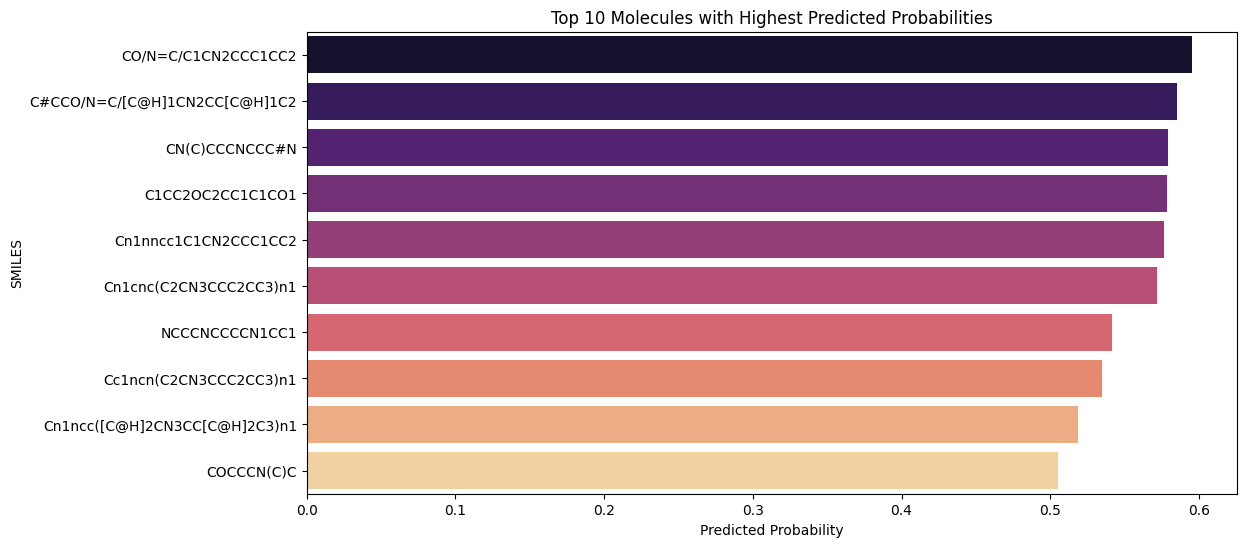

In [24]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='activity10', y='input', hue='input', data=top_predictions, palette='magma', legend=False)

# Set plot labels and title
plt.xlabel('Predicted Probability')
plt.ylabel('SMILES')
plt.title('Top 10 Molecules with Highest Predicted Probabilities')

#Save the plot
figure_path = '../figures/molecules_with_highest_predicted_probabilities.png'
plt.savefig(figure_path)

# Show the plot
plt.show()

The above visualization depicts the top ten molecules with the highest probability of being a hERG blockade.

### Molecules with lowest predicted probabilities

In [25]:
# Sort the DataFrame by predicted probabilities in descending order
low_predictions = predictions_df.sort_values(by='activity10', ascending=False).tail(10)

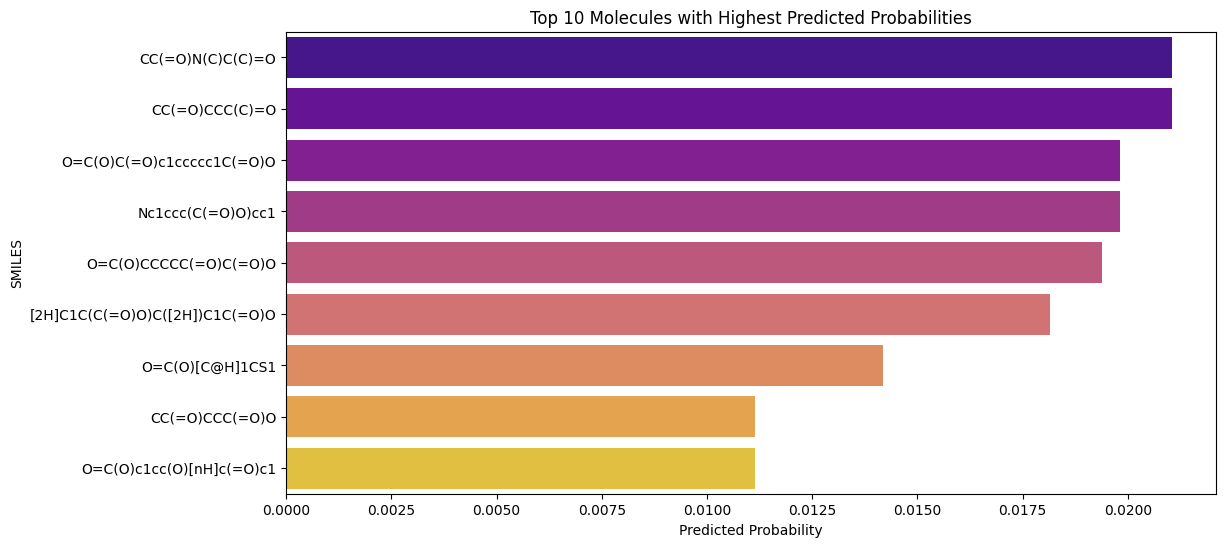

In [26]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='activity10', y='input', hue='input', data=low_predictions, palette='plasma', legend=False)

# Set plot labels and title
plt.xlabel('Predicted Probability')
plt.ylabel('SMILES')
plt.title('Top 10 Molecules with Highest Predicted Probabilities')

#Save the plot
figure_path = '../figures/molecules_with_lowest_predicted_probabilities.png'
plt.savefig(figure_path)

# Show the plot
plt.show()

The above visualization depicts the top ten molecules with the least probability of being a hERG blockade.

### Distribution of molecules by probability range

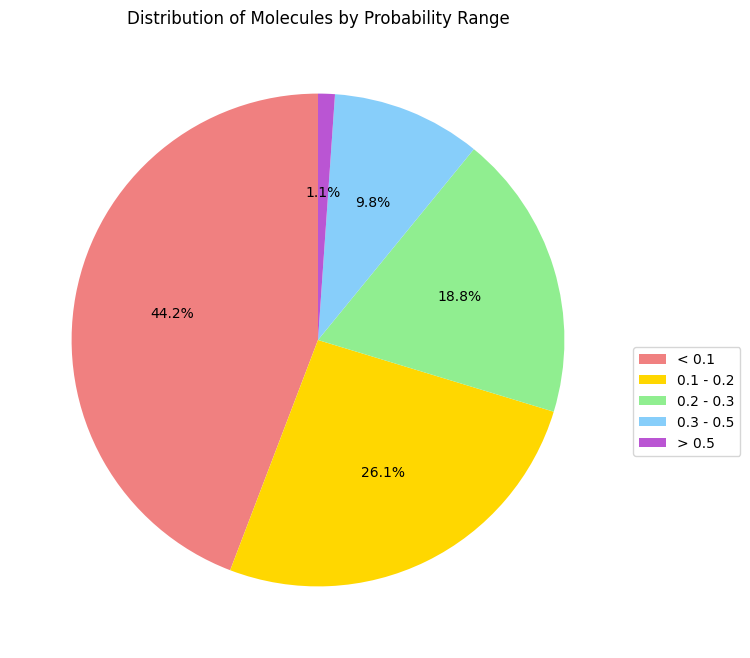

In [27]:
predictions_df['Probability Range'] = pd.cut(predictions_df['activity10'], bins=[-float('inf'), 0.1, 0.2, 0.3, 0.5, float('inf')],
                                            labels=['< 0.1', '0.1 - 0.2', '0.2 - 0.3', '0.3 - 0.5', '> 0.5'])

# Count the number of molecules in each probability range
counts = predictions_df['Probability Range'].value_counts()

# Define colors for each category
colors = ['lightcoral', 'gold', 'lightgreen', 'lightskyblue', 'mediumorchid']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, autopct='%1.1f%%', startangle=90, colors=colors)

# Create a legend outside the pie chart
plt.legend(labels=['< 0.1', '0.1 - 0.2', '0.2 - 0.3', '0.3 - 0.5', '> 0.5'], loc='upper left', bbox_to_anchor=(1, 0.5))

plt.title('Distribution of Molecules by Probability Range')

#Save the plot
figure_path = '../figures/distribution_of_molecules_by_probability_range.png'
plt.savefig(figure_path)

plt.show()

From the above visualization, we can see that from the sample of 1000 molecules, major percentage has a very low probability of being a hERG bloakade. And around 1.1% molecules have the probability of being a hERG blockade.

### Scatter plot of predicted probabilities

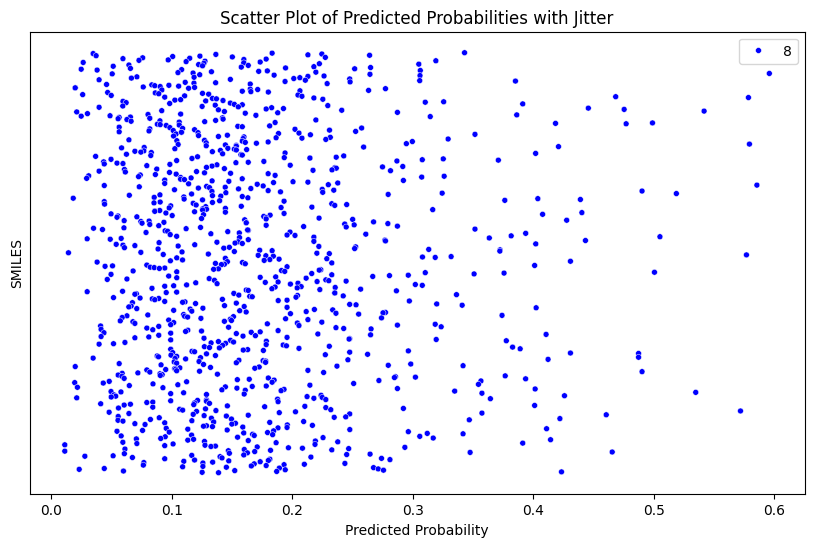

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='activity10', y='input', data=predictions_df, color='blue', size=8)

# Set plot labels and title
plt.xlabel('Predicted Probability')
plt.ylabel('SMILES')
plt.yticks([])
plt.title('Scatter Plot of Predicted Probabilities with Jitter')

#Save the plot
figure_path = '../figures/scat.png'
plt.savefig(figure_path)

# Show the plot
plt.show()